In [1]:
import cv2
import math
from matplotlib import pyplot as plt

In [2]:
def show_images(inp_img, out_img):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('../data/out_images/watercolor_result.png', img)

In [3]:
image = cv2.imread('../data/inp_images/tower.jpeg')
scale = float(3000)/(image.shape[0] + image.shape[1])
image = cv2.resize(image, (int(image.shape[1]*scale), int(image.shape[0]*scale)))

In [4]:
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
adjust_v = (img_hsv[:,:,2].astype("uint")+5)*3
adjust_v = ((adjust_v>255)*255 + (adjust_v<255)*adjust_v).astype("uint8")
img_hsv[:,:,2] = adjust_v
img_soft = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
img_soft = cv2.GaussianBlur(img_soft, (51, 51), 0)

In [5]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_gray = cv2.equalizeHist(img_gray)
invert = cv2.bitwise_not(img_gray)
blur = cv2.GaussianBlur(invert, (21, 21), 0)
invertedblur = cv2.bitwise_not(blur)
sketch = cv2.divide(img_gray, invertedblur, scale=265.0)
sketch = cv2.merge([sketch, sketch, sketch])

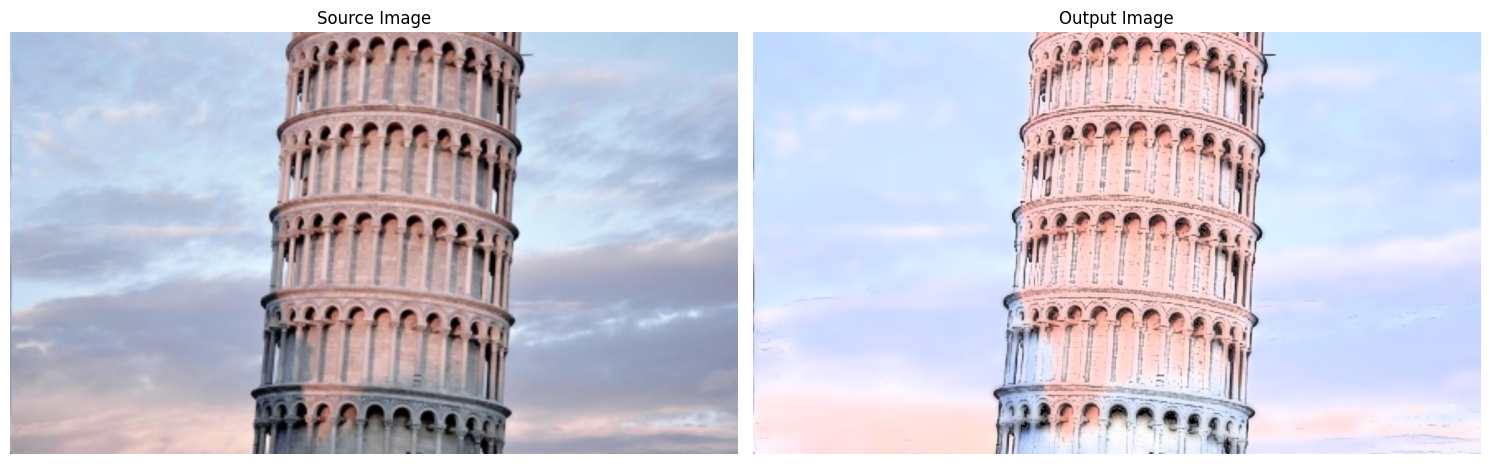

In [6]:
img_water = ((sketch/255.0)*img_soft).astype("uint8")
show_images(image, img_water)
save_image(img_water)